In [85]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [86]:
#import data
spam_df=pd.read_csv("spam.csv")

In [87]:
#inspect data
spam_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [89]:
spam_df['spam']=spam_df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [90]:
spam_df


,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


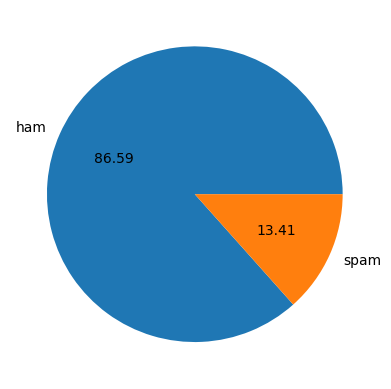

In [91]:
import matplotlib.pyplot as plt
plt.pie(spam_df['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [92]:
spam_df['num_characters'] = spam_df['Message'].apply(len)

In [93]:
spam_df['num_words'] = spam_df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [94]:
spam_df['num_sentences'] = spam_df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [95]:
spam_df

,Category,Message,spam,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,160,35,4
5568,ham,Will ü b going to esplanade fr home?,0,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,0,125,27,1


In [96]:
#creat train/test split
x_train,x_test,y_train,y_test = train_test_split(spam_df.Message,spam_df.spam)

In [97]:
x_train

3890                    Unlimited texts. Limited minutes.
4775    U repeat e instructions again. Wat's e road na...
508     You should know now. So how's anthony. Are you...
4053                              Ya ok, then had dinner?
2722       I'm working technical support :)voice process.
                              ...                        
1281    Oh ho. Is this the first time u use these type...
670                                 Did u receive my msg?
1726    You know there is. I shall speak to you in  &l...
3667    I'm turning off my phone. My moms telling ever...
1495    It has everything to do with the weather. Keep...
Name: Message, Length: 4179, dtype: object

In [98]:
y_train

3890    0
4775    0
508     0
4053    0
2722    0
       ..
1281    0
670     0
1726    0
3667    0
1495    0
Name: spam, Length: 4179, dtype: int64

In [99]:
x_train.describe()

count                       4179
unique                      3919
top       Sorry, I'll call later
freq                          22
Name: Message, dtype: object

In [100]:
#find word count and store in matrix
cv=CountVectorizer()
x_train_count= cv.fit_transform(x_train.values)

In [101]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [102]:
#train model
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [103]:
#pre test ham email
email_ham=["HI ANISH"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0], dtype=int64)

In [104]:
#pre test spam email
email_spam=["click here you won $10"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1], dtype=int64)

In [105]:
#test model
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)


0.9849246231155779

In [1]:
import pickel
pickel.dump(mnb,open('model.pkl','wb'))

ModuleNotFoundError: No module named 'pickel'